In [1]:
import httpx  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#" sudo docker run -t -i -p 5000:5000 -v ${PWD}:/data osrm/osrm-backend osrm-routed --algorithm mld /data/new-york-latest.osrm"

In [3]:
osrm_host = 'http://127.0.0.1'
osrm_port = 5000

In [5]:
def get_data(lon_src , lat_src,  lon_dst , lat_dst): 
    try: 
        request_url = f"{osrm_host}:{osrm_port}/route/v1/driving/{lon_src},{lat_src};{lon_dst},{lat_dst}"
        respons = httpx.get(request_url , trust_env=False, timeout=10).json() # prevent using proxy if its Fasle
        best_route= respons['routes'][0]
        duration = best_route['duration']
        distance = best_route['distance']
        return duration ,distance 
    except: 
        return np.nan ,np.nan

In [6]:
duration , distance = get_data(40.71792543422583, 40.77636800029203, 40.7851, -73.9473626995488)
duration , distance  # testing our url and its response

(651.7, 3646)

In [7]:
data = pd.read_csv("./data/nyc_taxi_data_2014.csv" )
df = data.sample(frac=.02)
df.head()

/tmp/ipykernel_10405/1951316522.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./data/nyc_taxi_data_2014.csv" )


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
14418159,CMT,2014-02-11 17:52:50,2014-02-11 18:00:41,1,1.70,-73.979234,40.766830,1,N,-73.992084,40.749031,CRD,7.5,1.0,0.5,1.00,0.0,10.00
9373452,VTS,2014-01-12 00:38:00,2014-01-12 00:47:00,1,2.38,-73.957083,40.770687,1,NaN,-73.978890,40.740720,CRD,9.5,0.5,0.5,1.00,0.0,11.50
9762927,VTS,2014-01-13 21:59:00,2014-01-13 22:02:00,6,0.70,-73.982067,40.778497,1,NaN,-73.984773,40.769960,CRD,4.5,0.5,0.5,1.25,0.0,6.75
12164702,CMT,2014-01-17 07:09:47,2014-01-17 07:18:49,1,1.60,-73.940298,40.807318,1,N,-73.961293,40.801426,CSH,8.5,0.0,0.5,0.00,0.0,9.00
5672043,CMT,2014-01-01 16:01:06,2014-01-01 16:03:58,1,0.70,-73.990962,40.734115,1,N,-73.997472,40.726041,CSH,4.5,0.0,0.5,0.00,0.0,5.00


In [8]:
df.isna().sum() 

vendor_id                  0
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_distance              0
pickup_longitude           0
pickup_latitude            0
rate_code                  0
store_and_fwd_flag    153194
dropoff_longitude          1
dropoff_latitude           1
payment_type               0
fare_amount                0
surcharge                  0
mta_tax                    0
tip_amount                 0
tolls_amount               0
total_amount               0
dtype: int64

In [9]:
df.drop('store_and_fwd_flag' , axis=1 , inplace=True) # this feature is not that important

In [10]:
df.dropna(inplace=True)


In [11]:
df.isna().sum()


vendor_id            0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
rate_code            0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
fare_amount          0
surcharge            0
mta_tax              0
tip_amount           0
tolls_amount         0
total_amount         0
dtype: int64

In [12]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
14418159,CMT,2014-02-11 17:52:50,2014-02-11 18:00:41,1,1.70,-73.979234,40.766830,1,-73.992084,40.749031,CRD,7.5,1.0,0.5,1.00,0.0,10.00
9373452,VTS,2014-01-12 00:38:00,2014-01-12 00:47:00,1,2.38,-73.957083,40.770687,1,-73.978890,40.740720,CRD,9.5,0.5,0.5,1.00,0.0,11.50
9762927,VTS,2014-01-13 21:59:00,2014-01-13 22:02:00,6,0.70,-73.982067,40.778497,1,-73.984773,40.769960,CRD,4.5,0.5,0.5,1.25,0.0,6.75
12164702,CMT,2014-01-17 07:09:47,2014-01-17 07:18:49,1,1.60,-73.940298,40.807318,1,-73.961293,40.801426,CSH,8.5,0.0,0.5,0.00,0.0,9.00
5672043,CMT,2014-01-01 16:01:06,2014-01-01 16:03:58,1,0.70,-73.990962,40.734115,1,-73.997472,40.726041,CSH,4.5,0.0,0.5,0.00,0.0,5.00


### since making 300k request is too much to handle with Internet of IRAN :() , i had to extract less samples for now 

In [13]:
sample_df = df.sample(frac=.01,  random_state=42).reset_index(drop=True)
sample_df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-01-24 05:11:00,2014-01-24 05:16:00,1,1.44,-73.981202,40.741507,1,-73.983632,40.753665,CSH,6.5,0.5,0.5,0.00,0.00,7.50
1,VTS,2014-01-25 03:19:00,2014-01-25 03:25:00,1,0.09,-73.991720,40.727352,1,-73.978367,40.724902,CRD,6.0,0.5,0.5,1.00,0.00,8.00
2,CMT,2014-01-23 01:52:34,2014-01-23 01:56:25,1,0.90,-73.983194,40.750465,1,-73.988956,40.758505,CSH,5.0,0.5,0.5,0.00,0.00,6.00
3,VTS,2014-01-24 10:55:00,2014-01-24 11:30:00,1,20.05,-73.972090,40.791700,2,-73.790190,40.646820,CRD,52.0,0.0,0.5,11.47,5.33,69.30
4,VTS,2014-01-30 06:42:00,2014-01-30 06:59:00,1,4.66,-73.981135,40.770957,1,-74.009710,40.722150,CRD,16.5,0.0,0.5,4.12,0.00,21.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,VTS,2014-01-13 16:02:00,2014-01-13 16:04:00,6,0.42,-73.976217,40.761687,1,-73.978005,40.757550,CSH,3.5,1.0,0.5,0.00,0.00,5.00
2996,CMT,2014-01-19 10:17:21,2014-01-19 10:29:05,1,3.60,0.000000,0.000000,1,0.000000,0.000000,CRD,13.0,0.0,0.5,2.70,0.00,16.20
2997,CMT,2014-01-16 23:08:54,2014-01-16 23:14:37,1,1.30,-74.002670,40.734304,1,-74.004550,40.717079,CSH,6.5,0.5,0.5,0.00,0.00,7.50
2998,VTS,2014-01-17 23:09:00,2014-01-17 23:12:00,3,0.70,-73.957847,40.776367,1,-73.963905,40.767922,CSH,4.5,0.5,0.5,0.00,0.00,5.50


### lets create two features , one for distance traveled , and one for trip duration with help of OSRM

In [14]:
OSRM_df = sample_df.apply(lambda x :pd.Series(get_data(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude'])), axis=1)

In [15]:
OSRM_df.columns = ['OSRM_duration' , 'OSRM_distance']
OSRM_df

,OSRM_duration,OSRM_distance
0,278.7,2041.6
1,219.8,1454.8
2,174.5,1426.5
3,1989.9,30836.6
4,831.7,6966.2
...,...,...
2995,64.3,543.4
2996,0.0,0.0
2997,339.2,2250.8
2998,145.4,1068.9


In [16]:
df = pd.concat([sample_df , OSRM_df], axis=1)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,OSRM_duration,OSRM_distance
0,VTS,2014-01-24 05:11:00,2014-01-24 05:16:00,1,1.44,-73.981202,40.741507,1,-73.983632,40.753665,CSH,6.5,0.5,0.5,0.00,0.00,7.50,278.7,2041.6
1,VTS,2014-01-25 03:19:00,2014-01-25 03:25:00,1,0.09,-73.991720,40.727352,1,-73.978367,40.724902,CRD,6.0,0.5,0.5,1.00,0.00,8.00,219.8,1454.8
2,CMT,2014-01-23 01:52:34,2014-01-23 01:56:25,1,0.90,-73.983194,40.750465,1,-73.988956,40.758505,CSH,5.0,0.5,0.5,0.00,0.00,6.00,174.5,1426.5
3,VTS,2014-01-24 10:55:00,2014-01-24 11:30:00,1,20.05,-73.972090,40.791700,2,-73.790190,40.646820,CRD,52.0,0.0,0.5,11.47,5.33,69.30,1989.9,30836.6
4,VTS,2014-01-30 06:42:00,2014-01-30 06:59:00,1,4.66,-73.981135,40.770957,1,-74.009710,40.722150,CRD,16.5,0.0,0.5,4.12,0.00,21.12,831.7,6966.2


### lets create some feature that might be usefull and affect our target like holidays , weekends and rush hours 


In [17]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['is_weekend'] = df['pickup_datetime'].dt.weekday.apply(lambda x : 1 if x>5 else 0)
df['is_rush_hour'] = df['pickup_datetime'].dt.hour.apply(lambda x : 1 if x in [7, 8,9 , 17, 18, 19] else 0)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,...,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,OSRM_duration,OSRM_distance,is_weekend,is_rush_hour
0,VTS,2014-01-24 05:11:00,2014-01-24 05:16:00,1,1.44,-73.981202,40.741507,1,-73.983632,40.753665,...,6.5,0.5,0.5,0.00,0.00,7.50,278.7,2041.6,0,0
1,VTS,2014-01-25 03:19:00,2014-01-25 03:25:00,1,0.09,-73.991720,40.727352,1,-73.978367,40.724902,...,6.0,0.5,0.5,1.00,0.00,8.00,219.8,1454.8,0,0
2,CMT,2014-01-23 01:52:34,2014-01-23 01:56:25,1,0.90,-73.983194,40.750465,1,-73.988956,40.758505,...,5.0,0.5,0.5,0.00,0.00,6.00,174.5,1426.5,0,0
3,VTS,2014-01-24 10:55:00,2014-01-24 11:30:00,1,20.05,-73.972090,40.791700,2,-73.790190,40.646820,...,52.0,0.0,0.5,11.47,5.33,69.30,1989.9,30836.6,0,0
4,VTS,2014-01-30 06:42:00,2014-01-30 06:59:00,1,4.66,-73.981135,40.770957,1,-74.009710,40.722150,...,16.5,0.0,0.5,4.12,0.00,21.12,831.7,6966.2,0,0


##### i decided to use both distance and duration as targets , just curious how multiple target would be handeled

In [26]:
target_df = df[['OSRM_duration', 'OSRM_distance']]
train_df = df.drop(['OSRM_duration' , 'OSRM_distance'], axis=1)

#### lets keep numerical columns 


In [27]:
train_df = train_df.select_dtypes(include=[int , float])

### with sklearn feature selection  , i decided to select some highly correlated features with our target

#### pionts to consider , feature selection in sklearn might not choose boolean type (0 ,1) in our model becuase it doesn't have trend that alighns with target , we have to add it manaully sometimes


In [28]:
from sklearn.feature_selection import SelectKBest , f_classif

selector_duration = SelectKBest(score_func=f_classif, k=8)
selector_distance = SelectKBest(score_func=f_classif, k=8)

selected_duration =selector_duration.fit(train_df, target_df.iloc[:, 0])  
selectd_distance = selector_distance.fit(train_df, target_df.iloc[:, 1])  

selected_features = train_df.columns[np.logical_or(selected_duration.get_support() , selectd_distance.get_support())] 
# logical or says if one of them is True keep for both but if both is false , ignore it 

train_df = train_df[selected_features]
train_df 

,passenger_count,trip_distance,fare_amount,surcharge,tip_amount,tolls_amount,total_amount,is_weekend,is_rush_hour
0,1,1.44,6.5,0.5,0.00,0.00,7.50,0,0
1,1,0.09,6.0,0.5,1.00,0.00,8.00,0,0
2,1,0.90,5.0,0.5,0.00,0.00,6.00,0,0
3,1,20.05,52.0,0.0,11.47,5.33,69.30,0,0
4,1,4.66,16.5,0.0,4.12,0.00,21.12,0,0
...,...,...,...,...,...,...,...,...,...
2995,6,0.42,3.5,1.0,0.00,0.00,5.00,0,0
2996,1,3.60,13.0,0.0,2.70,0.00,16.20,1,0
2997,1,1.30,6.5,0.5,0.00,0.00,7.50,0,0
2998,3,0.70,4.5,0.5,0.00,0.00,5.50,0,0


In [29]:
whole_df = pd.concat([train_df , target_df], axis=1)
whole_df

,passenger_count,trip_distance,fare_amount,surcharge,tip_amount,tolls_amount,total_amount,is_weekend,is_rush_hour,OSRM_duration,OSRM_distance
0,1,1.44,6.5,0.5,0.00,0.00,7.50,0,0,278.7,2041.6
1,1,0.09,6.0,0.5,1.00,0.00,8.00,0,0,219.8,1454.8
2,1,0.90,5.0,0.5,0.00,0.00,6.00,0,0,174.5,1426.5
3,1,20.05,52.0,0.0,11.47,5.33,69.30,0,0,1989.9,30836.6
4,1,4.66,16.5,0.0,4.12,0.00,21.12,0,0,831.7,6966.2
...,...,...,...,...,...,...,...,...,...,...,...
2995,6,0.42,3.5,1.0,0.00,0.00,5.00,0,0,64.3,543.4
2996,1,3.60,13.0,0.0,2.70,0.00,16.20,1,0,0.0,0.0
2997,1,1.30,6.5,0.5,0.00,0.00,7.50,0,0,339.2,2250.8
2998,3,0.70,4.5,0.5,0.00,0.00,5.50,0,0,145.4,1068.9


In [30]:
target_corr =whole_df.corr()[target_df.columns]
target_corr = target_corr.drop([*target_df.columns, 'is_weekend' , 'is_rush_hour']) 
# i just wanted to see target correlation with other features not themselves to themselves and also not for boolean values

Text(0.5, 1.0, 'rush hour travels count and average duration')

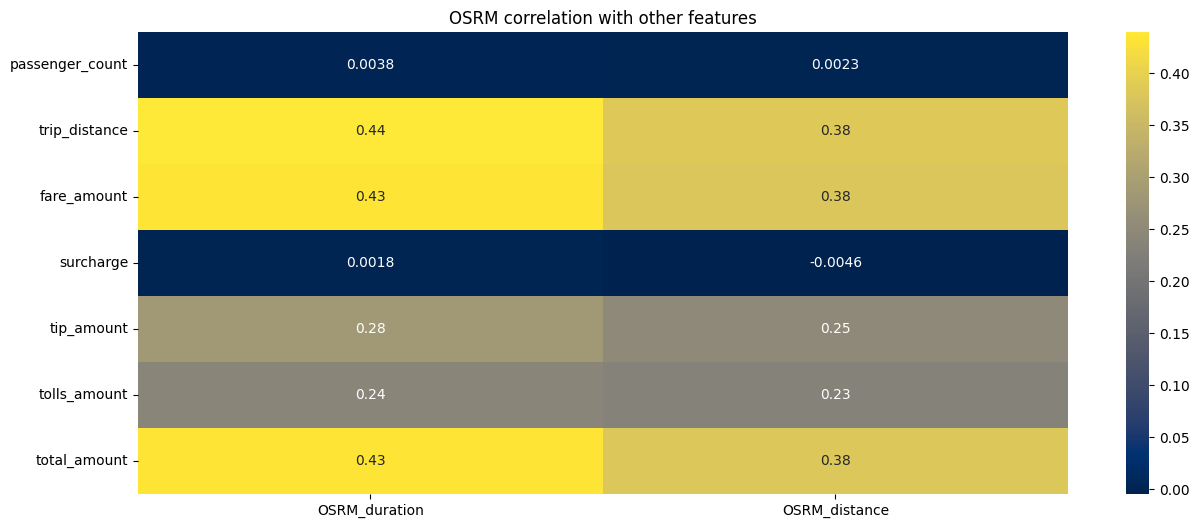

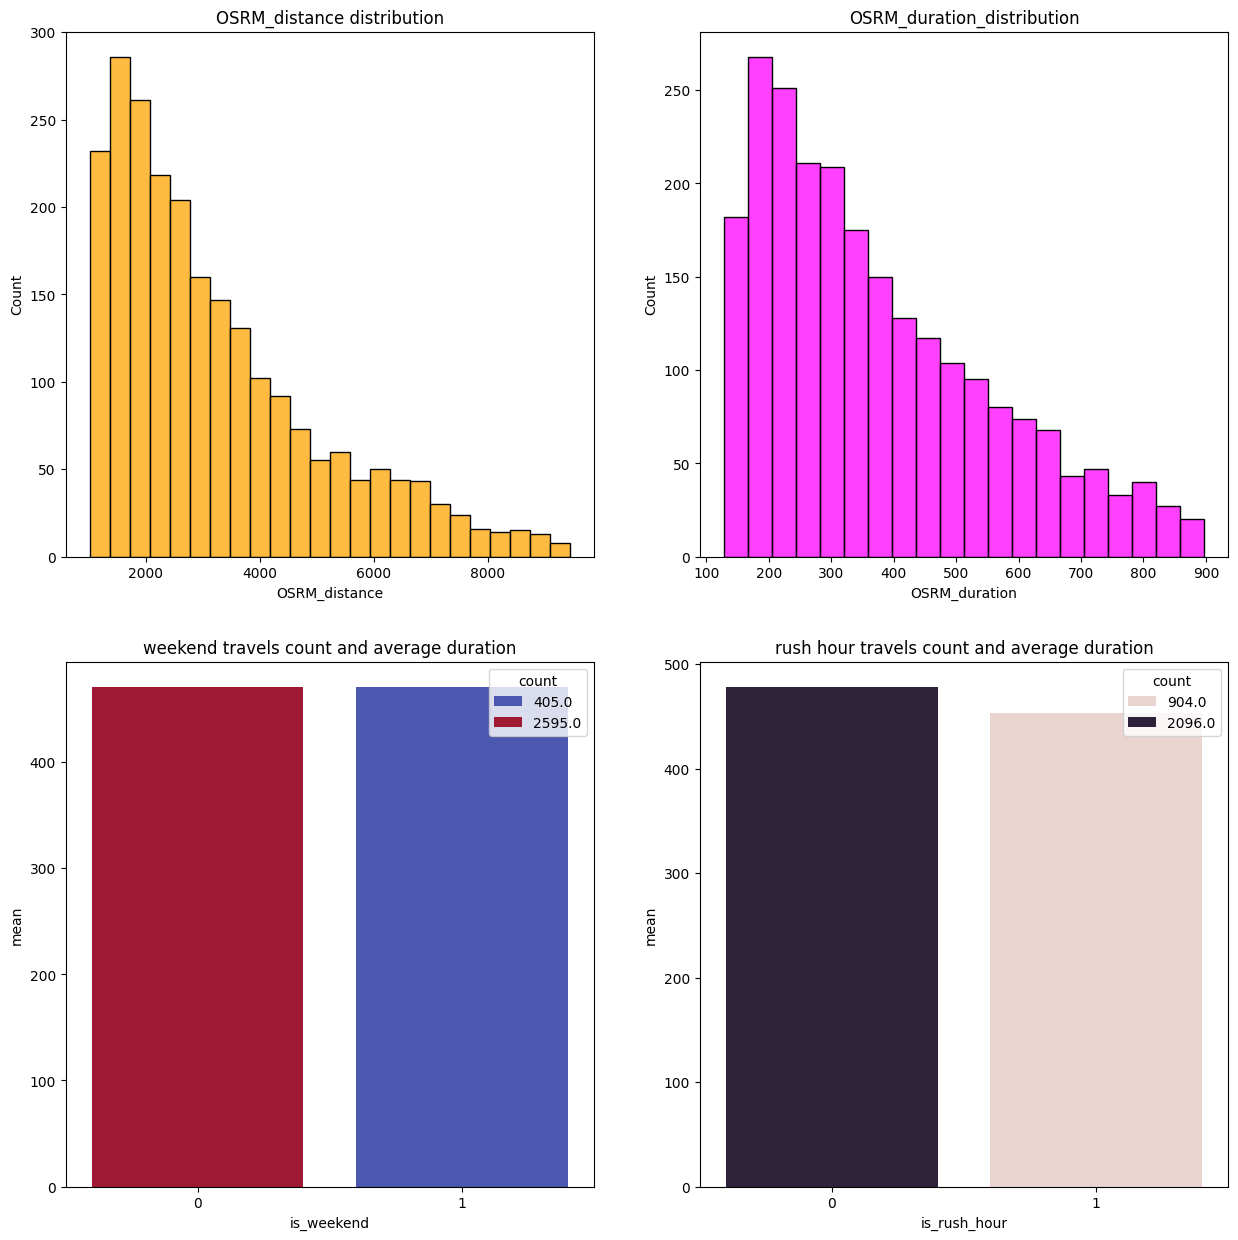

In [32]:
fig2, ax2 = last_axes = plt.subplots(figsize = (15, 6))
sns.heatmap(target_corr,  annot=True, cmap='cividis' , ax=ax2)
ax2.set_title('OSRM correlation with other features')


fig ,axes = plt.subplots(2, 2 , figsize=(15, 15)) 

top_threshold = target_df.quantile(0.90)
bottom_threshold = target_df.quantile(0.10)
clean_target_df = target_df[(target_df['OSRM_duration'].between(bottom_threshold['OSRM_duration'] , top_threshold['OSRM_duration'])) &( 
                     target_df['OSRM_distance'].between(bottom_threshold['OSRM_distance'], top_threshold['OSRM_distance']))]
# i decided to remove outlier to see the distribution of data without outliers

sns.histplot(clean_target_df['OSRM_distance'], ax=axes[0, 0], color='orange')
axes[0,0].set_title('OSRM_distance distribution')
sns.histplot(clean_target_df['OSRM_duration'], ax=axes[0, 1] , color='magenta')
axes[0,1].set_title('OSRM_duration_distribution')

weekend_group = df.groupby("is_weekend")["OSRM_duration"].describe()
weekend_df = weekend_group.reset_index()
sns.barplot(x ='is_weekend', y='mean', hue='count', data=weekend_df , palette='coolwarm' , ax=axes[1, 0])
axes[1,0].set_title('weekend travels count and average duration')


rush_group = df.groupby('is_rush_hour')['OSRM_duration'].describe()
rush_group_df = rush_group.reset_index()
sns.barplot(x='is_rush_hour', y='mean' , hue='count', ax=axes[1, 1], data=rush_group_df)
axes[1,1].set_title('rush hour travels count and average duration')


### as we can see even the count of trips is significantly lower in rush hours and weeekend compare to all days but mean duration is keeping up , telling that time duration in weekend and rush hours are high

# lets bulid our model